<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%202/ClassificationCitarumWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.decomposition import PCA
import mglearn

In [66]:
# Upload file CSV
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Baca dataset
df = pd.read_csv(file_name)

# Tampilkan informasi awal
print("Data Awal:")
print(df.head())
print("\nInformasi Dataset:")
print(df.info())

# Cek missing values
print("\nJumlah Missing Values:")
print(df.isnull().sum())

# Nama kolom dataset
print("\nNama Kolom Dataset:")
print(df.columns)


Saving CitarumWater.csv to CitarumWater (8).csv
Data Awal:
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>


In [67]:
# Pastikan kolom target benar
kolom_target = "Class"
kolom_target = kolom_target.strip()

if kolom_target not in df.columns:
    raise KeyError(f"Kolom target '{kolom_target}' tidak ditemukan dalam dataset. Periksa kembali nama kolom.")

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=[kolom_target])
y = df[kolom_target]

# Pilih hanya kolom numerik untuk normalisasi
X = X.select_dtypes(include=[np.number])

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Buat model Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y)), y_prob, multi_class='ovr')



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [68]:
# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Akurasi: 0.9660
Presisi: 0.9658
Recall: 0.9660
F1-score: 0.9655
AUC: 0.9913


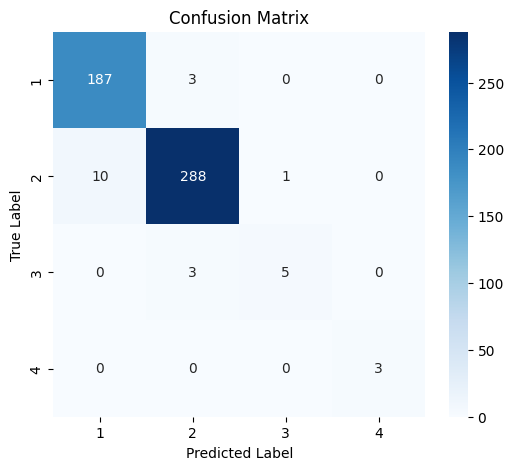

In [69]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


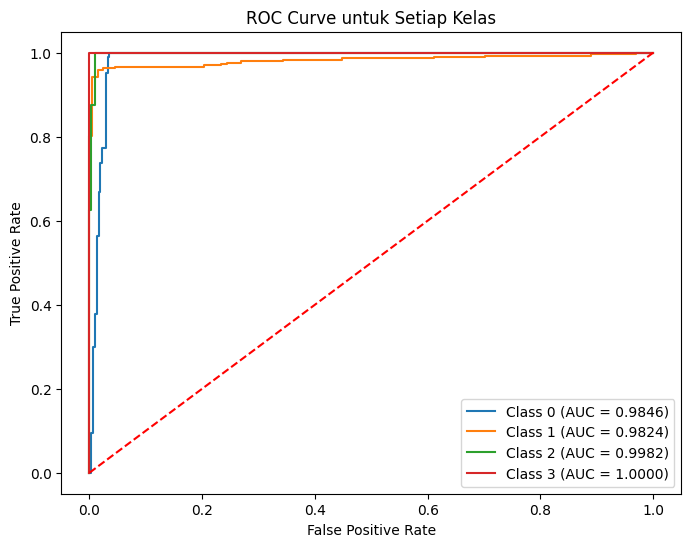

In [70]:
# Plot ROC Curve untuk setiap kelas
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve untuk Setiap Kelas")
plt.legend()
plt.show()

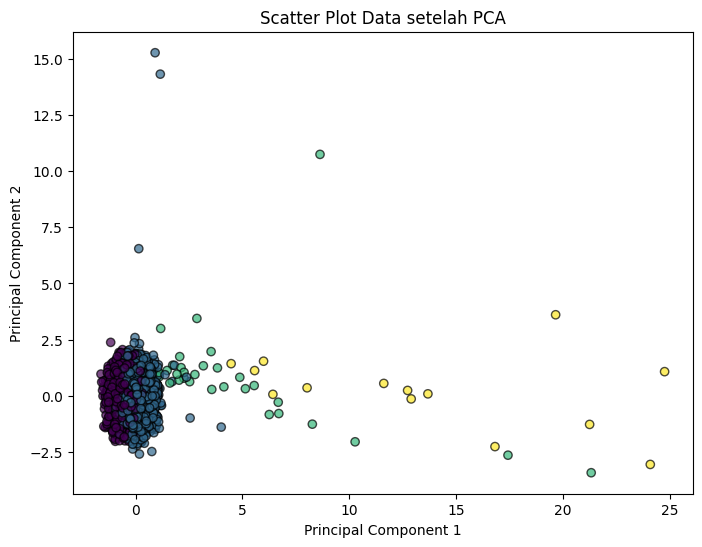

In [71]:
# Visualisasi PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot Data setelah PCA")
plt.show()

In [72]:
# Penjelasan Persamaan Matematika
print("\nPersamaan Matematika yang Digunakan:")
print("1. Akurasi: (TP + TN) / (TP + TN + FP + FN)")
print("2. Presisi: TP / (TP + FP)")
print("3. Recall (Sensitivitas): TP / (TP + FN)")
print("4. F1-score: 2 * (Presisi * Recall) / (Presisi + Recall)")
print("5. AUC-ROC: Area di bawah kurva ROC yang menunjukkan kemampuan model membedakan kelas.")


Persamaan Matematika yang Digunakan:
1. Akurasi: (TP + TN) / (TP + TN + FP + FN)
2. Presisi: TP / (TP + FP)
3. Recall (Sensitivitas): TP / (TP + FN)
4. F1-score: 2 * (Presisi * Recall) / (Presisi + Recall)
5. AUC-ROC: Area di bawah kurva ROC yang menunjukkan kemampuan model membedakan kelas.


1. Akurasi = TP+TN/TP+TN+FP+FN
    Menunjukkan seberapa banyak prediksi yang benar dibandingkan total prediksi.
2. Presisi TP/ TP+FP
    Menunjukkan berapa banyak dari prediksi positif yang benar-benar positif.
3. Recall TP/TP+FN
    Mengukur seberapa baik model menemukan semua sampel positif.
4. F1-score
    F1= 2x Presisi x Recall/ Presisi + Recall
    Rata-rata harmonik dari presisi dan recall.
5. AUC (Area Under Curve)
    Luas di bawah kurva ROC yang menunjukkan seberapa baik model membedakan kelas positif dan negatif.
6. ROC Curve
    Menunjukkan hubungan antara False Positive Rate (FPR) dan True Positive Rate (TPR).